# Telecom Churn Case Study

### Problem Statment

You have a telecom firm which has collected data of all its customers. The main types of attributes are:

Demographics (age, gender etc.)

Services availed (internet packs purchased, special offers taken etc.)

Expenses (amount of recharge done per month etc.)

Based on all this past information, you want to build a model which will predict whether a particular customer will churn or not, i.e. whether they will switch to a different service provider or not. So the variable of interest, i.e. the target variable here is ‘Churn’ which will tell us whether or not a particular customer has churned. It is a binary variable - 1 means that the customer has churned and 0 means the customer has not churned.


### Business Objective

With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively.
 
The telecom company wants to understand the factors on which the churn depends. Essentially, it wants to know:

Which variables are significant in predicting the churning of customers so that it can take necessary action to retain customers in their company.

To create a logistic regression model that quantitatively relates churn probability.



The solution is divided into the following sections: 
- Importing Libraries
- Merging all data frames into one dataframe
- Data understanding and exploration
- Data Preparation
- Data Visualisation 
- Data preparation
- Model building and evaluation

### Importing Libraries

In [244]:
# Importing Pandas and NumPy
import pandas as pd,numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [245]:
# Importing all datasets
churn_data = pd.read_csv("churn_data.csv")
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [246]:
customer_data = pd.read_csv("customer_data.csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [247]:
internet_data = pd.read_csv("internet_data.csv")
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


### Merging all data frames into one dataframe

In [248]:
# Merging on 'customerID'
df = pd.merge(churn_data, customer_data, how='inner', on='customerID')

In [249]:
# Final dataframe with all predictor variables
telecom = pd.merge(df, internet_data, how='inner', on='customerID')

## Data understanding and exploration

In [250]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [251]:
# Let's check the dimensions of the dataframe
telecom.shape

(7043, 21)

In [252]:
# Let's see the type of each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [253]:
# let's look at the statistical aspects of the dataframe
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [254]:
# Check for empty rows and columns
print(telecom.isnull().all(axis=1).sum())
print(telecom.isnull().all(axis=0).sum())

0
0


The rows and columns of the dataframe doesnot contain any missing values.

In [255]:
# Check if there are any duplicate values in the dataset
telecom[telecom.duplicated(keep=False)]

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies


There is no duplicate values in the dataset.

# Data Preparation

Converting binary variables(Yes/No) to (1/0)

In [256]:
var = ['PaperlessBilling','PhoneService','Churn', 'Partner', 'Dependents']

In [257]:
# Defining a map function
def binary_map(x):
    return x.map({'Yes':1,'No':0})
telecom[var] = telecom[var].apply(binary_map)

In [258]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


In [259]:
# Selecting categorical columns
col= telecom.select_dtypes(include='object').columns
print(col)

Index(['customerID', 'Contract', 'PaymentMethod', 'TotalCharges', 'gender',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')


## Data Visualisation


In [260]:
#Visualising some of the categorical variables
cat_var =['Contract', 'PaymentMethod','gender',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Churn']

In [261]:
# Filter a Churn cases dataset for for visualising 

churn = telecom[~(telecom['Churn'] == 0)]
churn.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,8,1,Month-to-month,1,Electronic check,99.65,820.5,1,Female,...,0,0,Yes,Fiber optic,No,No,Yes,No,Yes,Yes
8,7892-POOKP,28,1,Month-to-month,1,Electronic check,104.80,3046.05,1,Female,...,1,0,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes
13,0280-XJGEX,49,1,Month-to-month,1,Bank transfer (automatic),103.70,5036.3,1,Male,...,0,0,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes


In [262]:
# lets define a function to plot loan_status across categorical variables
def plot_cat(cat_var):
    sns.countplot(x=cat_var, data= churn , hue= 'Churn' ,palette='pastel', linewidth=5)
    plt.show()

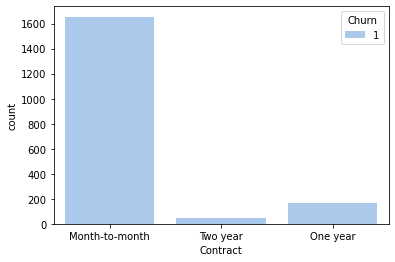

In [263]:
# compare Churn rates across Contract
plot_cat('Contract')

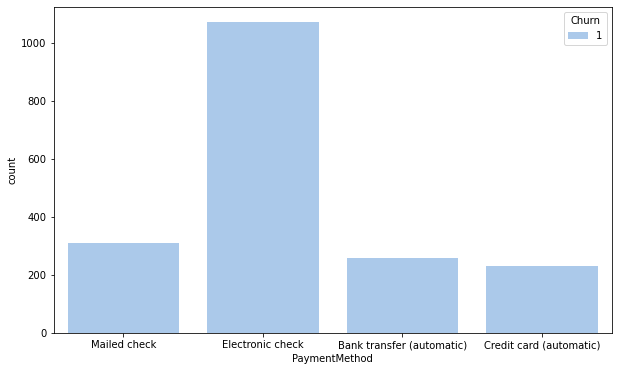

In [264]:
plt.figure(figsize=(10, 6))
plot_cat('PaymentMethod')

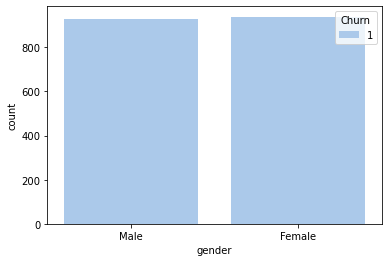

In [265]:
# compare Churn counts across gender
plot_cat('gender')

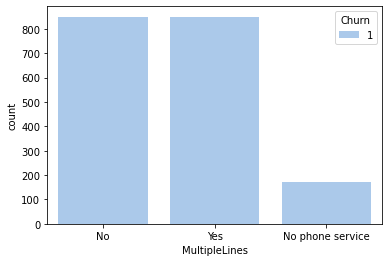

In [266]:
# compare Churn counts across 'MultipleLines'
plot_cat('MultipleLines')

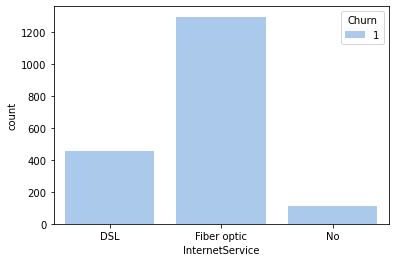

In [267]:
# compare Churn counts across 'InternetService'
plot_cat('InternetService')

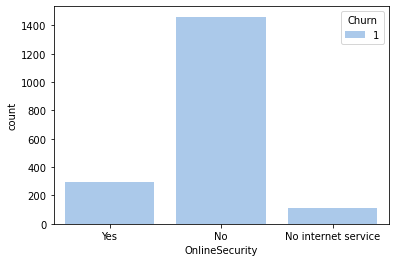

In [268]:
# compare Churn counts across 'OnlineSecurity'
plot_cat('OnlineSecurity')

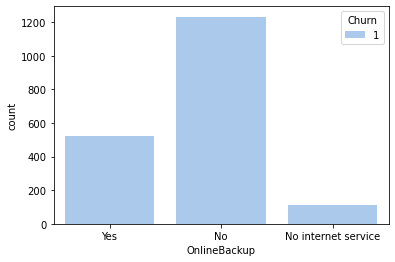

In [269]:
# compare Churn counts across 'OnlineBackup'
plot_cat('OnlineBackup')

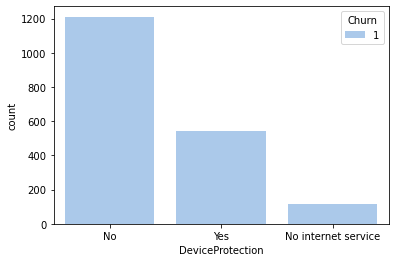

In [270]:
# compare Churn counts across 'DeviceProtection'
plot_cat('DeviceProtection')

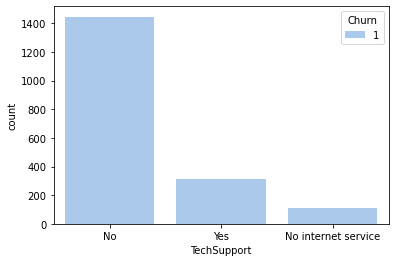

In [271]:
# compare Churn counts across 'TechSupport'
plot_cat('TechSupport')

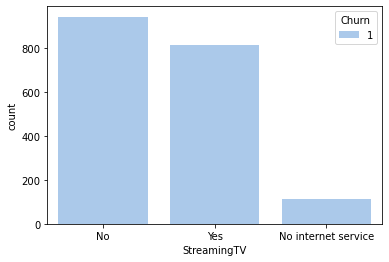

In [272]:
# compare Churn counts across'StreamingTV'
plot_cat('StreamingTV')

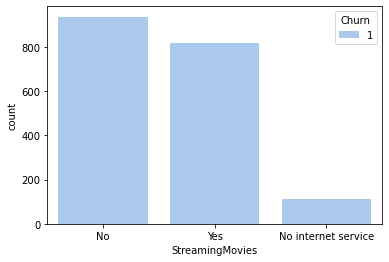

In [273]:
# compare Churn counts across 'StreamingMovies'
plot_cat('StreamingMovies')

**Observations**

- Churn counts are higher in, 
    - Month to Month in Contract
    - Electronic check in Paymentmethod
    - FiberOptic in InternetService
    - If OnlineSecurity ,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies are not available
    

In [274]:
# Columns having single value?
telecom.columns[telecom.nunique() == 1]

Index([], dtype='object')

##### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [275]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

# Adding the results to the master dataframe
telecom = pd.concat([telecom, dummy], axis=1)

In [276]:
telecom['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [277]:
telecom['PhoneService'].value_counts()

1    6361
0     682
Name: PhoneService, dtype: int64

In [278]:
#check for some categorical columns
varlist = ['InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

In [279]:
telecom[varlist].value_counts()

InternetService  OnlineSecurity       OnlineBackup         DeviceProtection     TechSupport          StreamingTV          StreamingMovies    
No               No internet service  No internet service  No internet service  No internet service  No internet service  No internet service    1526
Fiber optic      No                   No                   No                   No                   No                   No                      399
DSL              No                   No                   No                   No                   No                   No                      294
Fiber optic      No                   No                   No                   No                   Yes                  Yes                     181
                                      Yes                  Yes                  No                   Yes                  Yes                     164
                                                                                                            

Now, out of these levels, it is best that you drop **No internet service** since it isn’t of any use because it is anyway being indicated by the variable 'InternetService' already present in the dataframe.

To simply put it, the variable 'InternetService' already tells you whether the InternetService are availed or not by a particular customer. In fact, if you check the value counts of the variable 'InternetService', 'No internet service' appears **1526** times which is exactly equal to the count of the level 'No internet service' in 'InternetService'.

Similarly in ‘PhoneService’ the level **No** appears **682** times which is exactly equal to the count of the level 'No phone service' in 'MultipleLines'.

So **No internet service** and **No phone service** are redundant since they doesn't contain any extra information and hence, to drop them is the best option.

So we have to drop it manually after getting the dummies.

In [280]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1], axis=1)

In [281]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,1,0,1,0,1,0,1,0,1,0


###### Dropping the repeated variables

In [282]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [283]:
#The varaible was imported as a string we need to convert it to float
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'],errors='coerce')

In [284]:
telecom['TotalCharges'].value_counts()

20.20      11
19.75       9
20.05       8
19.90       8
19.65       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: TotalCharges, Length: 6530, dtype: int64

In [285]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [286]:
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

Observation:
    
    TotalCharges have 11 missing records.  
    It means that 11/7043 = 0.001561834 i.e 0.1% is missing.

In [287]:
#Imputing the missing values with median vales
telecom['TotalCharges'] = telecom['TotalCharges'].fillna(telecom['TotalCharges'].mean())

In [288]:
telecom['TotalCharges'].isnull().sum()

0

#### Checking for Outliers

In [289]:
# Checking for outliers in the continuous variables
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges','Churn']]


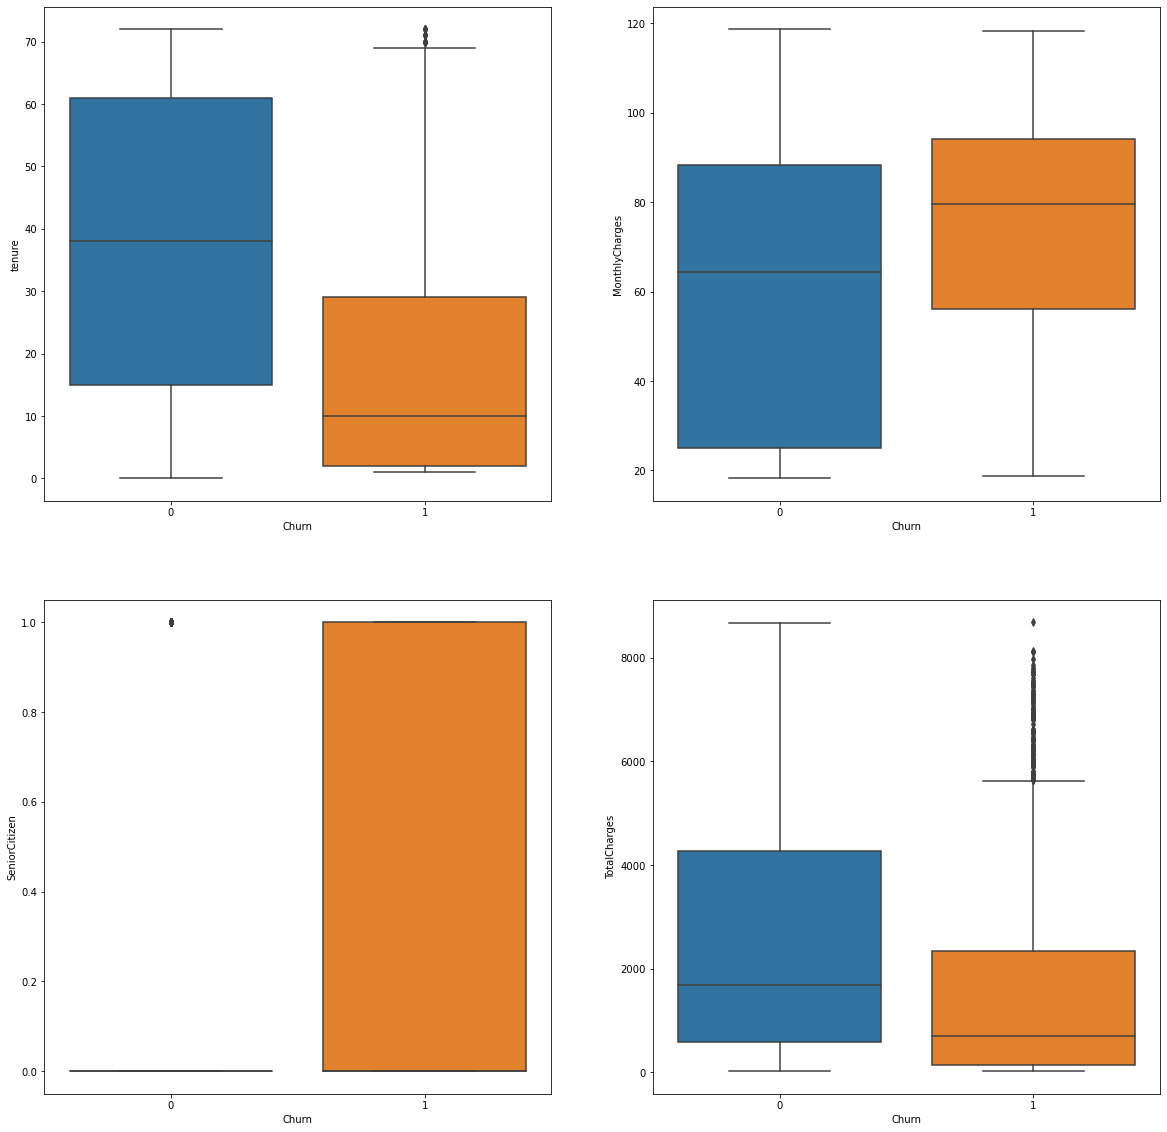

In [290]:
plt.figure(figsize=(20, 20))  
plt.subplot(2,2,1)
sns.boxplot(x = 'Churn', y = 'tenure', data = num_telecom)
plt.subplot(2,2,2)
sns.boxplot(x = 'Churn', y = 'MonthlyCharges', data = num_telecom)
plt.subplot(2,2,3)
sns.boxplot(x = 'Churn', y = 'SeniorCitizen', data = num_telecom)
plt.subplot(2,2,4)
sns.boxplot(x = 'Churn', y = 'TotalCharges', data =num_telecom)

plt.show()

**Observations**

- Churn cases are higher in MonthlyCharges and SeniorCitizen.
- Non Churn cases are higher in TotalCharges and tenure.


In [291]:
# All numeric variables in the dataset
numeric_df = df.select_dtypes(include=['float64'])
numeric_df.head()

,MonthlyCharges
0,29.85
1,56.95
2,53.85
3,42.30
4,70.70


In [292]:
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [293]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2265.000258
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,402.225000
50%,29.000000,70.350000,0.000000,1400.550000
75%,55.000000,89.850000,0.000000,3786.600000
90%,69.000000,102.600000,1.000000,5973.690000
95%,72.000000,107.400000,1.000000,6921.025000
99%,72.000000,114.729000,1.000000,8039.256000


From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

## Test-Train Split

In [294]:
# Putting feature variable to X
X = telecom.drop(['Churn','customerID'], axis=1)

X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,...,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,...,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [295]:
# Putting response variable to y
y = telecom['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [296]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [297]:
scaler = MinMaxScaler()
X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

X_train.head()


,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
877,0.708333,0,0,0.417539,0.353496,0,0,1,1,0,...,1,0,0,1,0,1,0,1,0,1
5792,0.208333,1,1,0.777778,0.162744,1,0,0,0,0,...,1,0,0,1,0,1,1,0,0,1
5334,0.680556,1,1,0.893871,0.609666,0,1,1,0,1,...,0,1,0,1,0,1,0,1,0,1
878,0.833333,1,0,0.463378,0.464751,0,0,0,1,0,...,1,0,0,1,0,1,1,0,1,0
6578,0.138889,1,0,0.551071,0.077965,0,0,1,1,0,...,1,0,0,1,0,1,1,0,0,1


In [298]:
### Checking the Churn Rate
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn

26.536987079369588

We have almost 27% churn rate

### Looking at Correlations

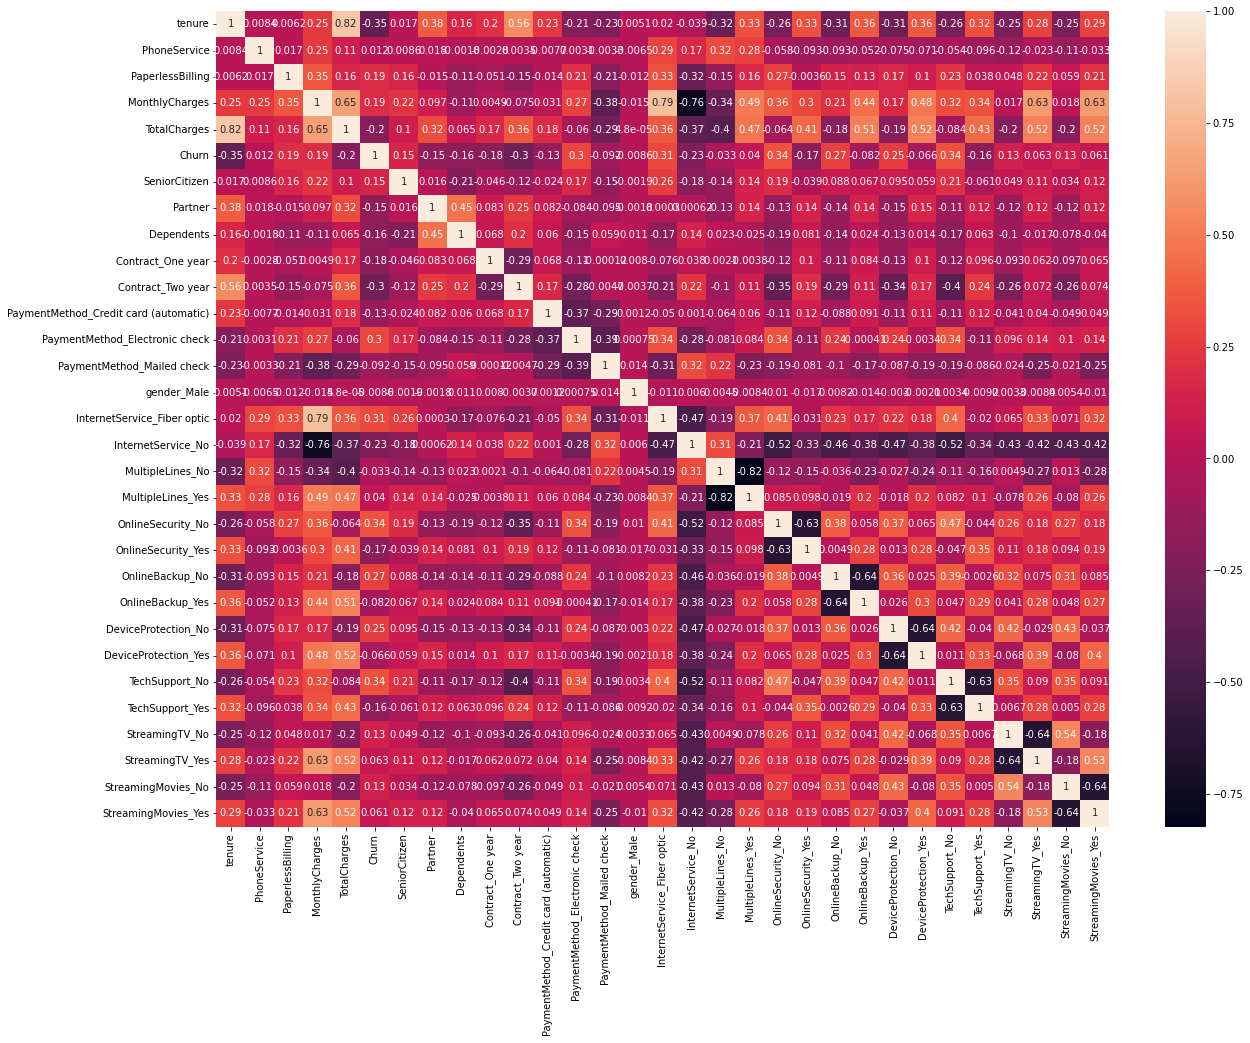

In [299]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,15))        # Size of the figure
sns.heatmap(telecom.corr(),annot = True)
plt.show()


### Dropping highly correlated dummy variables

In [300]:
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], 1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'StreamingTV_No','StreamingMovies_No'], 1)

# Model Building

Running Your First Training Model

### Model-1

In [301]:
import statsmodels.api as sm
# Logistic regression model with all the independent variables
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2008.6
Date:                Wed, 19 Oct 2022   Deviance:                       4017.3
Time:                        18:56:18   Pearson chi2:                 5.71e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2883
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.5018      0.335      1.498      0.134      -0.155       1.158
tenure                                   -3.8075      0.508     -7.488      0.000      -4.804      -2.811
PhoneService                              0.4167      0.786      0.530      0.596      -1.124       1.957
PaperlessBilling                          0.3445      0.090      3.820      0.000       0.168       0.521
MonthlyCharges                           -5.0773      3.863     -1.314      0.189     -12.649       2.495
TotalCharges                              2.1521      0.707      3.042      0.002       0.766       3.539
SeniorCitizen                             0.2943      0.103      2.870      0.004       0.093       0.495
Partner                                   0.0259      0.094      0.275      0.783      -0.158       0.210
Dependents                               -0.2234      0.108     -2.075      0.038      -0.434      -0.012
Contract_One year                        -0.6766      0.129     -5.232      0.000      -0.930      -0.423
Contract_Two year                        -1.3507      0.207     -6.518      0.000      -1.757      -0.945
PaymentMethod_Credit card (automatic)    -0.1523      0.138     -1.102      0.270      -0.423       0.119
PaymentMethod_Electronic check            0.2744      0.114      2.405      0.016       0.051       0.498
PaymentMethod_Mailed check               -0.0881      0.139     -0.636      0.525      -0.360       0.184
gender_Male                              -0.0411      0.078     -0.524      0.600      -0.195       0.113
InternetService_Fiber optic               2.0272      0.967      2.096      0.036       0.132       3.922
InternetService_No                       -2.1775      0.977     -2.228      0.026      -4.093      -0.262
MultipleLines_Yes                         0.5551      0.215      2.583      0.010       0.134       0.976
OnlineSecurity_Yes                       -0.0420      0.217     -0.194      0.846      -0.466       0.382
OnlineBackup_Yes                         -0.0187      0.211     -0.089      0.929      -0.433       0.396
DeviceProtection_Yes                      0.2031      0.213      0.952      0.341      -0.215       0.621
TechSupport_Yes                          -0.2517      0.219     -1.149      0.250      -0.681       0.177
StreamingTV_Yes                           0.7026      0.397      1.770      0.077      -0.075       1.480
StreamingMovies_Yes                       0.6728      0.396      1.698      0.089      -0.104       1.449
=========================================================================================================
"""

## Feature Selection Using RFE

Now, you have close to **23** features. It is obviously not recommended to manually eliminate these features. So let's now build a model using recursive feature elimination to select features. We'll first start off with an arbitrary number of features (12 seems to be a good number to begin with), and then use the statsmodels library to build models using the shortlisted features 

In [302]:
logreg = LogisticRegression()

In [303]:
rfe = RFE(logreg,n_features_to_select = 12)             # running RFE with 12 variables as output
rfe = rfe.fit(X_train, y_train)

In [304]:
rfe.support_

array([ True,  True,  True, False,  True,  True, False, False,  True,
        True, False,  True, False, False,  True,  True,  True, False,
       False, False,  True, False, False])

In [305]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', False, 11),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 12),
 ('Dependents', False, 5),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 7),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', False, 8),
 ('gender_Male', False, 9),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', False, 2),
 ('OnlineBackup_Yes', False, 4),
 ('DeviceProtection_Yes', False, 10),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', False, 3),
 ('StreamingMovies_Yes', False, 6)]

In [306]:
col = X_train.columns[rfe.support_]

In [307]:
X_train.columns[~rfe.support_]

Index(['MonthlyCharges', 'Partner', 'Dependents',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'gender_Male', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

Assessing the model with StatsModels

### Model-2

In [308]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4917
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2027.2
Date:                Wed, 19 Oct 2022   Deviance:                       4054.4
Time:                        18:56:19   Pearson chi2:                 5.82e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2830
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.0324      0.158     -0.206      0.837      -0.341       0.276
tenure                            -4.0259      0.482     -8.360      0.000      -4.970      -3.082
PhoneService                      -0.6599      0.155     -4.245      0.000      -0.965      -0.355
PaperlessBilling                   0.3861      0.089      4.342      0.000       0.212       0.560
TotalCharges                       2.2904      0.637      3.597      0.000       1.042       3.539
SeniorCitizen                      0.3401      0.100      3.403      0.001       0.144       0.536
Contract_One year                 -0.6841      0.127     -5.377      0.000      -0.933      -0.435
Contract_Two year                 -1.3937      0.206     -6.766      0.000      -1.797      -0.990
PaymentMethod_Electronic check     0.3969      0.083      4.806      0.000       0.235       0.559
InternetService_Fiber optic        0.8641      0.116      7.428      0.000       0.636       1.092
InternetService_No                -0.8152      0.158     -5.146      0.000      -1.126      -0.505
MultipleLines_Yes                  0.3132      0.095      3.281      0.001       0.126       0.500
TechSupport_Yes                   -0.5109      0.103     -4.957      0.000      -0.713      -0.309
==================================================================================================
"""

In [309]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

877     0.036636
5792    0.480285
5334    0.084953
878     0.030249
6578    0.124047
3090    0.412680
3043    0.730020
5028    0.049167
4463    0.713499
2822    0.090556
dtype: float64

In [310]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0366359 , 0.48028501, 0.08495283, 0.0302489 , 0.12404701,
       0.41267964, 0.73001979, 0.04916716, 0.7134991 , 0.09055561])

Creating a dataframe with the actual churn flag and the predicted probabilities

In [311]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.036636,877
1,1,0.480285,5792
2,1,0.084953,5334
3,0,0.030249,878
4,0,0.124047,6578


Since the logistic curve gives you just the probabilities and not the actual classification of 'Churn' and 'Non-Churn', you need to find a threshold probability to classify customers as 'churn' and 'non-churn'. Here, we choose 0.5 as an arbitrary cutoff wherein if the probability of a particular customer churning is less than 0.5, you'd classify it as 'Non-Churn' and if it's greater than 0.5, you'd classify it as 'Churn'. The choice of **0.5** is completely arbitrary at this stage and you'll learn how to find the optimal cutoff in 'Model Evaluation', but for now, we'll move forward with 0.5 as the cutoff.

In [312]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.036636,877,0
1,1,0.480285,5792,0
2,1,0.084953,5334,0
3,0,0.030249,878,0
4,0,0.124047,6578,0


In [313]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[3262  365]
 [ 569  734]]


In [314]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8105476673427991


So using the confusion matrix, you got an **accuracy of about 81.0%** which seems to be a good number to begin with.

##### Checking VIFs

In [315]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,tenure,14.63
3,TotalCharges,13.51
1,PhoneService,7.26
8,InternetService_Fiber optic,3.95
6,Contract_Two year,3.34
9,InternetService_No,2.99
2,PaperlessBilling,2.67
10,MultipleLines_Yes,2.49
11,TechSupport_Yes,2.06
5,Contract_One year,2.00


There are a few variables with high VIF,but P-values are significant. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. 

In [316]:
# Let's drop MonthlyCharges since it has a high VIF
col = col.drop('tenure')
col

Index(['PhoneService', 'PaperlessBilling', 'TotalCharges', 'SeniorCitizen',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'TechSupport_Yes'],
      dtype='object')

### Model-3

In [317]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4918
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2067.7
Date:                Wed, 19 Oct 2022   Deviance:                       4135.4
Time:                        18:56:20   Pearson chi2:                 4.90e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2711
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.6549      0.138     -4.760      0.000      -0.925      -0.385
PhoneService                      -0.3692      0.146     -2.527      0.012      -0.656      -0.083
PaperlessBilling                   0.3739      0.088      4.256      0.000       0.202       0.546
TotalCharges                      -2.6790      0.244    -10.978      0.000      -3.157      -2.201
SeniorCitizen                      0.3112      0.099      3.137      0.002       0.117       0.506
Contract_One year                 -0.8288      0.124     -6.690      0.000      -1.072      -0.586
Contract_Two year                 -1.6323      0.198     -8.227      0.000      -2.021      -1.243
PaymentMethod_Electronic check     0.4102      0.082      4.995      0.000       0.249       0.571
InternetService_Fiber optic        1.1471      0.109     10.478      0.000       0.933       1.362
InternetService_No                -1.0173      0.156     -6.502      0.000      -1.324      -0.711
MultipleLines_Yes                  0.3254      0.094      3.475      0.001       0.142       0.509
TechSupport_Yes                   -0.4119      0.102     -4.044      0.000      -0.611      -0.212
==================================================================================================
"""

In [318]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [319]:
y_train_pred[:10]

array([0.05506489, 0.49003218, 0.05440727, 0.05872907, 0.10448831,
       0.34051138, 0.60393281, 0.02953264, 0.70914409, 0.1057531 ])

In [320]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [321]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.055065,877,0
1,1,0.490032,5792,0
2,1,0.054407,5334,0
3,0,0.058729,878,0
4,0,0.104488,6578,0


In [322]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8066937119675457


The overall accuracy has not dropped much.

In [323]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,PhoneService,7.19
2,TotalCharges,5.48
7,InternetService_Fiber optic,3.71
5,Contract_Two year,2.81
8,InternetService_No,2.75
1,PaperlessBilling,2.62
9,MultipleLines_Yes,2.49
10,TechSupport_Yes,2.05
4,Contract_One year,1.85
6,PaymentMethod_Electronic check,1.82


In [324]:
# Let's drop MonthlyCharges since it has a high VIF
col = col.drop('PhoneService')
col

Index(['PaperlessBilling', 'TotalCharges', 'SeniorCitizen',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'TechSupport_Yes'],
      dtype='object')

### Model-4

In [325]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4919
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2070.9
Date:                Wed, 19 Oct 2022   Deviance:                       4141.7
Time:                        18:56:21   Pearson chi2:                 4.87e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2701
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.8985      0.100     -8.965      0.000      -1.095      -0.702
PaperlessBilling                   0.3785      0.088      4.314      0.000       0.207       0.550
TotalCharges                      -2.6593      0.244    -10.906      0.000      -3.137      -2.181
SeniorCitizen                      0.3313      0.099      3.350      0.001       0.137       0.525
Contract_One year                 -0.8277      0.124     -6.680      0.000      -1.071      -0.585
Contract_Two year                 -1.6222      0.199     -8.170      0.000      -2.011      -1.233
PaymentMethod_Electronic check     0.4183      0.082      5.101      0.000       0.258       0.579
InternetService_Fiber optic        1.0296      0.098     10.518      0.000       0.838       1.222
InternetService_No                -1.1414      0.148     -7.728      0.000      -1.431      -0.852
MultipleLines_Yes                  0.2806      0.091      3.067      0.002       0.101       0.460
TechSupport_Yes                   -0.4234      0.102     -4.167      0.000      -0.623      -0.224
==================================================================================================
"""

In [326]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [327]:
y_train_pred[:10]

array([0.04353246, 0.49616171, 0.05331851, 0.063762  , 0.11141264,
       0.37035332, 0.55257907, 0.03060339, 0.71344636, 0.1132452 ])

In [328]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [329]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.043532,877,0
1,1,0.496162,5792,0
2,1,0.053319,5334,0
3,0,0.063762,878,0
4,0,0.111413,6578,0


In [330]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8016227180527383


The overall accuracy has not dropped much.

In [331]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalCharges,5.46
6,InternetService_Fiber optic,3.03
4,Contract_Two year,2.79
8,MultipleLines_Yes,2.39
0,PaperlessBilling,2.36
9,TechSupport_Yes,1.92
3,Contract_One year,1.81
5,PaymentMethod_Electronic check,1.74
7,InternetService_No,1.65
2,SeniorCitizen,1.31


In [332]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop('TotalCharges')
col

Index(['PaperlessBilling', 'SeniorCitizen', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Electronic check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'TechSupport_Yes'],
      dtype='object')

### Model-5

In [333]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4920
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2134.0
Date:                Wed, 19 Oct 2022   Deviance:                       4268.0
Time:                        18:56:22   Pearson chi2:                 4.86e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2512
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.9713      0.099     -9.825      0.000      -1.165      -0.778
PaperlessBilling                   0.3365      0.086      3.895      0.000       0.167       0.506
SeniorCitizen                      0.2099      0.095      2.210      0.027       0.024       0.396
Contract_One year                 -1.4235      0.113    -12.607      0.000      -1.645      -1.202
Contract_Two year                 -2.4834      0.184    -13.465      0.000      -2.845      -2.122
PaymentMethod_Electronic check     0.4730      0.080      5.937      0.000       0.317       0.629
InternetService_Fiber optic        0.7209      0.093      7.780      0.000       0.539       0.903
InternetService_No                -0.9086      0.146     -6.225      0.000      -1.195      -0.623
MultipleLines_Yes                 -0.0602      0.085     -0.709      0.478      -0.227       0.106
TechSupport_Yes                   -0.6342      0.098     -6.450      0.000      -0.827      -0.442
==================================================================================================
"""

In [334]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [335]:
y_train_pred[:10]

array([0.04613239, 0.41624862, 0.04345018, 0.06810052, 0.04355386,
       0.34641803, 0.51201823, 0.07185648, 0.6362436 , 0.15899437])

In [336]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [337]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.046132,877,0
1,1,0.416249,5792,0
2,1,0.043450,5334,0
3,0,0.068101,878,0
4,0,0.043554,6578,0


In [338]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.7878296146044624


In [339]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,InternetService_Fiber optic,2.59
0,PaperlessBilling,2.35
7,MultipleLines_Yes,2.12
3,Contract_Two year,1.89
8,TechSupport_Yes,1.75
4,PaymentMethod_Electronic check,1.73
6,InternetService_No,1.49
2,Contract_One year,1.43
1,SeniorCitizen,1.30


In [340]:
# Let's drop MonthlyCharges since it has a high VIF
col = col.drop('MultipleLines_Yes')
col

Index(['PaperlessBilling', 'SeniorCitizen', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Electronic check',
       'InternetService_Fiber optic', 'InternetService_No', 'TechSupport_Yes'],
      dtype='object')

### Model-6

In [341]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4921
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2134.3
Date:                Wed, 19 Oct 2022   Deviance:                       4268.5
Time:                        18:56:23   Pearson chi2:                 4.85e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2511
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.9782      0.098     -9.944      0.000      -1.171      -0.785
PaperlessBilling                   0.3332      0.086      3.864      0.000       0.164       0.502
SeniorCitizen                      0.2039      0.095      2.155      0.031       0.018       0.389
Contract_One year                 -1.4323      0.112    -12.759      0.000      -1.652      -1.212
Contract_Two year                 -2.4999      0.183    -13.660      0.000      -2.859      -2.141
PaymentMethod_Electronic check     0.4729      0.080      5.938      0.000       0.317       0.629
InternetService_Fiber optic        0.6986      0.087      8.020      0.000       0.528       0.869
InternetService_No                -0.9056      0.146     -6.207      0.000      -1.191      -0.620
TechSupport_Yes                   -0.6359      0.098     -6.469      0.000      -0.829      -0.443
==================================================================================================
"""

In [342]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [343]:
y_train_pred[:10]

array([0.04537775, 0.40655767, 0.04385559, 0.07087364, 0.04537775,
       0.34413394, 0.50798875, 0.06855766, 0.62870325, 0.16603223])

In [344]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [345]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.045378,877,0
1,1,0.406558,5792,0
2,1,0.043856,5334,0
3,0,0.070874,878,0
4,0,0.045378,6578,0


In [346]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.7876267748478701


In [389]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
vif['Features']

0                  PaperlessBilling
5       InternetService_Fiber optic
3                 Contract_Two year
7                   TechSupport_Yes
4    PaymentMethod_Electronic check
6                InternetService_No
2                 Contract_One year
1                     SeniorCitizen
Name: Features, dtype: object

In [348]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [349]:
# Let's see the other metrices of our logistic regression model
print("sensitivity-", TP / float(TP+FN))
print("specificity-", TN / float(TN+FP))
print("false postive rate-", FP/ float(TN+FP))
print ("positive predictive-", TP / float(TP+FP))
print ("Negative predictive-", TN / float(TN+ FN))

sensitivity- 0.5633154259401382
specificity- 0.8993658671078026
false postive rate- 0.10063413289219741
positive predictive- 0.6678798908098271
Negative predictive- 0.8514748107543723


So although the accuracy is about **79%, the model only predicts 56.3% of churn cases correctly.**

 

In essence, what’s happening here is that you care more about one class (class='churn') than the other. This is a very common situation in classification problems - you almost always care more about one class than the other. On the other hand, the accuracy tells you model's performance on both classes combined - which is fine, but not the most important metric.

So, the model seems to have high accuracy **(79%)** and high specificity **(89.93%)**, but low sensitivity **(56.3%)** and since you're interested in identifying the customers which might churn, you clearly need to deal with this. 

 


# Plotting the ROC Curve 

In [350]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [351]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

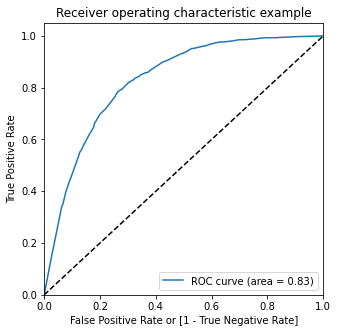

In [352]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

The ROC curve shows the trade-off between True Positive Rate and False Positive Rate which essentially can also be viewed as a tradeoff between Sensitivity and Specificity. As you can see, on the Y-axis, you have the values of Sensitivity and on the X-axis, you have the value of (1 - Specificity). Notice that in the curve when Sensitivity is increasing, (1 - Specificity), And since, (1 - Specificity) is increasing, it simply means that Specificity is decreasing. 

A good ROC curve is the one which touches the upper-left corner of the graph; so higher the area under the curve of an ROC curve, the better is your model.
Here the **AUC(area under the curve) is 83%** so it is a good model.

# Finding Optimal Cutoff Point

Now, this cut-off(0.5) was chosen at random and there was no particular logic behind it. So it might not be the ideal cut-off point for classification which is why we might be getting such a low sensitivity.So let's find for optimal cut-off point.

In [353]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.045378,877,0,1,0,0,0,0,0,0,0,0,0
1,1,0.406558,5792,0,1,1,1,1,1,0,0,0,0,0
2,1,0.043856,5334,0,1,0,0,0,0,0,0,0,0,0
3,0,0.070874,878,0,1,0,0,0,0,0,0,0,0,0
4,0,0.045378,6578,0,1,0,0,0,0,0,0,0,0,0


In [354]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.264300  1.000000  0.000000
0.1   0.1  0.598174  0.951650  0.471188
0.2   0.2  0.695943  0.857252  0.637993
0.3   0.3  0.748479  0.784344  0.735594
0.4   0.4  0.777890  0.666155  0.818031
0.5   0.5  0.787627  0.550269  0.872898
0.6   0.6  0.779513  0.339985  0.937414
0.7   0.7  0.735700  0.000000  1.000000
0.8   0.8  0.735700  0.000000  1.000000
0.9   0.9  0.735700  0.000000  1.000000


As you can see, when the probability thresholds are very low, the sensitivity is very high and specificity is very low. Similarly, for larger probability thresholds, the sensitivity values are very low but the specificity values are very high. And at about 0.3, the three metrics seem to be almost equal with decent values and hence, we choose **0.3 as the optimal cut-off point.** 

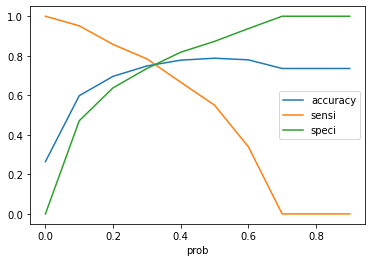

In [355]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see, at about a threshold of **0.3**, the curves of accuracy, sensitivity and specificity intersect, and they all take a value of around 73-78%.

In [356]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.045378,877,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.406558,5792,0,1,1,1,1,1,0,0,0,0,0,1
2,1,0.043856,5334,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.070874,878,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.045378,6578,0,1,0,0,0,0,0,0,0,0,0,0


In [357]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.7484787018255578

In [358]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[2668,  959],
       [ 281, 1022]], dtype=int64)

In [359]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [360]:
# Let's see the other metrices of our logistic regression model
print("sensitivity-", TP / float(TP+FN))
print("specificity-", TN / float(TN+FP))
print("false postive rate-", FP/ float(TN+FP))
print ("positive predictive-", TP / float(TP+FP))
print ("Negative predictive-", TN / float(TN+ FN))

sensitivity- 0.7843438219493477
specificity- 0.7355941549489936
false postive rate- 0.26440584505100634
positive predictive- 0.5159010600706714
Negative predictive- 0.904713462190573


In business context sometimes you might want a higher sensitivity, sometimes you might want a higher specificity.

As it is a churn prediction case so sensitivity should be higher.Churns should pe predicted more according to business point of view.
So here we can go for the cut-off point as **0.2** as shown above from Sensitivity-Specificity Trade-off at 0.2 probability **69.5% ,85.7%,63.7%**
are the accuracy,sensitivity and specificity values respectively.

In [361]:
#By choosing 0.2 as cut-off point
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.045378,877,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.406558,5792,0,1,1,1,1,1,0,0,0,0,0,1
2,1,0.043856,5334,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.070874,878,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.045378,6578,0,1,0,0,0,0,0,0,0,0,0,0


In [362]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.6959432048681542

In [363]:
confusion3 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion3

array([[2314, 1313],
       [ 186, 1117]], dtype=int64)

In [364]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [365]:
# Let's see the other metrices of our logistic regression model
print("sensitivity-", TP / float(TP+FN))
print("specificity-", TN / float(TN+FP))
print("false postive rate-", FP/ float(TN+FP))
print ("positive predictive-", TP / float(TP+FP))
print ("Negative predictive-", TN / float(TN+ FN))

sensitivity- 0.8572524942440521
specificity- 0.6379928315412187
false postive rate- 0.36200716845878134
positive predictive- 0.4596707818930041
Negative predictive- 0.9256


**Observations**

Here sensitivity(positives) is higher i.e **86%** as compare to specificity(negative) which is about **64%**.According to our business context we need sensitivity shold be higher i.e churned should be predicted correctly.   

## Making predictions on the test set

In [366]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [367]:
X_test = X_test[col]
X_test.head()

,PaperlessBilling,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,InternetService_Fiber optic,InternetService_No,TechSupport_Yes
4880,0,0,0,1,0,0,1,0
1541,0,0,0,1,0,0,1,0
1289,0,0,1,0,0,0,0,1
5745,1,0,0,1,0,0,1,0
4873,0,0,0,0,0,0,1,0


In [368]:
X_test_sm = sm.add_constant(X_test)

In [369]:
y_test_pred = res.predict(X_test_sm)

In [370]:
y_test_pred[:10]

4880    0.012327
1541    0.012327
1289    0.045378
5745    0.017118
4873    0.131963
4168    0.022299
1557    0.308351
2892    0.131963
664     0.012327
1588    0.207914
dtype: float64

In [371]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [372]:
# Let's see the head
y_pred_1.head()

,0
4880,0.012327
1541,0.012327
1289,0.045378
5745,0.017118
4873,0.131963


In [373]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [374]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [375]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [376]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [377]:
y_pred_final.head()

,Churn,CustID,0
0,0,4880,0.012327
1,0,1541,0.012327
2,0,1289,0.045378
3,0,5745,0.017118
4,0,4873,0.131963


In [378]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [379]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Churn','Churn_Prob'], axis=1)

In [380]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,4880,0,0.012327
1,1541,0,0.012327
2,1289,0,0.045378
3,5745,0,0.017118
4,4873,0,0.131963


In [381]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.2 else 0)

In [382]:
y_pred_final.head()

,CustID,Churn,Churn_Prob,final_predicted
0,4880,0,0.012327,0
1,1541,0,0.012327,0
2,1289,0,0.045378,0
3,5745,0,0.017118,0
4,4873,0,0.131963,0


In [383]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.6578324656885944

In [384]:
confusion4 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion4

array([[911, 636],
       [ 87, 479]], dtype=int64)

In [385]:
TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

In [386]:
# Let's see the other metrices of our logistic regression model
print("sensitivity-", TP / float(TP+FN))
print("specificity-", TN / float(TN+FP))
print("false postive rate-", FP/ float(TN+FP))
print ("positive predictive-", TP / float(TP+FP))
print ("Negative predictive-", TN / float(TN+ FN))

sensitivity- 0.8462897526501767
specificity- 0.5888817065287654
false postive rate- 0.41111829347123463
positive predictive- 0.4295964125560538
Negative predictive- 0.9128256513026052


**Observations** 

Sensitivity is approx **86%** in train dataset where as it is nearly **85%** in unseen data which is prety good at **0.2 cutoff point**

The metrics seem to hold on the test dataset as well. So, it looks like you have created a decent model for the churn dataset as the metrics are decent for both the training and test datasets.

 